In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Election_Data.xlsx to Election_Data (1).xlsx


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
election_df = pd.read_excel('Election_Data.xlsx', sheet_name = 'Election_Dataset_Two Classes')
election_df.head(10)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
5,6,Labour,47,3,4,4,4,4,2,male
6,7,Labour,57,2,2,4,4,11,2,male
7,8,Labour,77,3,4,4,1,1,0,male
8,9,Labour,39,3,3,4,4,11,0,female
9,10,Labour,70,3,2,5,1,11,2,male


In [ ]:
election_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


* Out of **10 columns** in election_df, **8 columns are of integer datatype and 2 columns are of object datatype**

In [ ]:
election_df.isnull().sum()

,0
Unnamed: 0,0
vote,0
age,0
economic.cond.national,0
economic.cond.household,0
Blair,0
Hague,0
Europe,0
political.knowledge,0
gender,0


* election_df doesn't contain missing data.

In [ ]:
election_df[election_df.duplicated()]

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


* election_df doesn't contain any duplicate data point(row).

In [ ]:
# Since 'Unnamed: 0' column is of no significance, hence 'Unnamed: 0' is being removed from election_df

election_df.drop('Unnamed: 0', axis = 1, inplace = True)
election_df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


**Exploratory Data Analysis**

In [ ]:
print('Number of parties contesting the election are {} and they are {}\n'.format(election_df['vote'].nunique(), election_df['vote'].unique()))

print('Votes each party secured are as follows {}-\n'.format(election_df['vote'].value_counts()))

print('Votes each party secured in % are as follows {}-\n'.format(election_df['vote'].value_counts(normalize = True)))

Number of parties contesting the election are 2 and they are ['Labour' 'Conservative']

Votes each party secured are as follows vote
Labour          1063
Conservative     462
Name: count, dtype: int64-

Votes each party secured in % are as follows vote
Labour          0.697049
Conservative    0.302951
Name: proportion, dtype: float64-



Text(0.5, 1.0, 'Histplot showing the distribution of votes secured by the contesting parties.')

<Figure size 300x400 with 0 Axes>

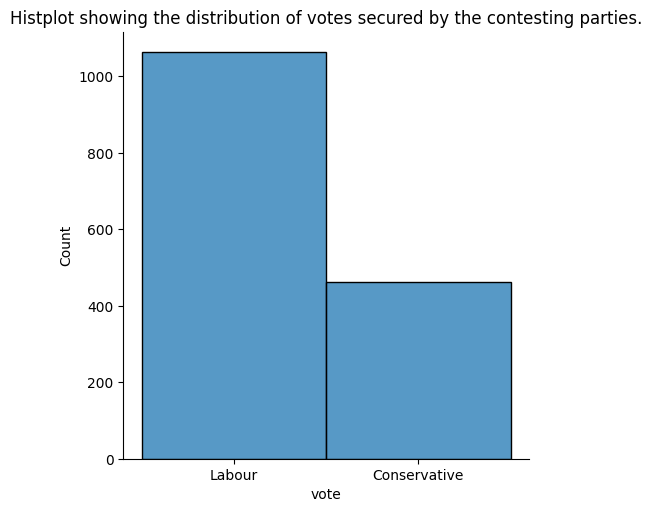

In [ ]:
plt.figure(figsize = (3, 4))
sns.displot(x = 'vote', data = election_df, kind = 'hist')
plt.title('Histplot showing the distribution of votes secured by the contesting parties.')

* The election data involves two parties, **Labour** and **Conservative, with Labour securing approximately 70% of the votes (1063 votes) and Conservative securing 30% (462 votes)**.

In [ ]:
print('The voters in election_df are of age-\n{}\n'.format(election_df['age'].unique()))

print('Number of voters of different age groups-\n{}\n'.format(election_df['age'].value_counts()))

print('Percentage of voters of different age groups-\n{}\n'.format(election_df['age'].value_counts(normalize = True)))

The voters in election_df are of age-
[43 36 35 24 41 47 57 77 39 70 66 59 51 79 37 38 53 44 60 56 61 55 62 76
 27 52 48 72 42 54 50 46 33 58 64 32 71 28 34 68 67 88 40 78 65 74 82 49
 84 81 45 69 31 63 89 83 29 92 73 75 26 90 25 80 30 86 85 87 93 91]

Number of voters of different age groups-
age
37    42
35    39
49    39
47    38
54    37
      ..
87     3
92     2
90     1
93     1
91     1
Name: count, Length: 70, dtype: int64

Percentage of voters of different age groups-
age
37    0.027541
35    0.025574
49    0.025574
47    0.024918
54    0.024262
        ...   
87    0.001967
92    0.001311
90    0.000656
93    0.000656
91    0.000656
Name: proportion, Length: 70, dtype: float64



Text(0.5, 1.0, 'Countplot showing the number of voters of different age.')

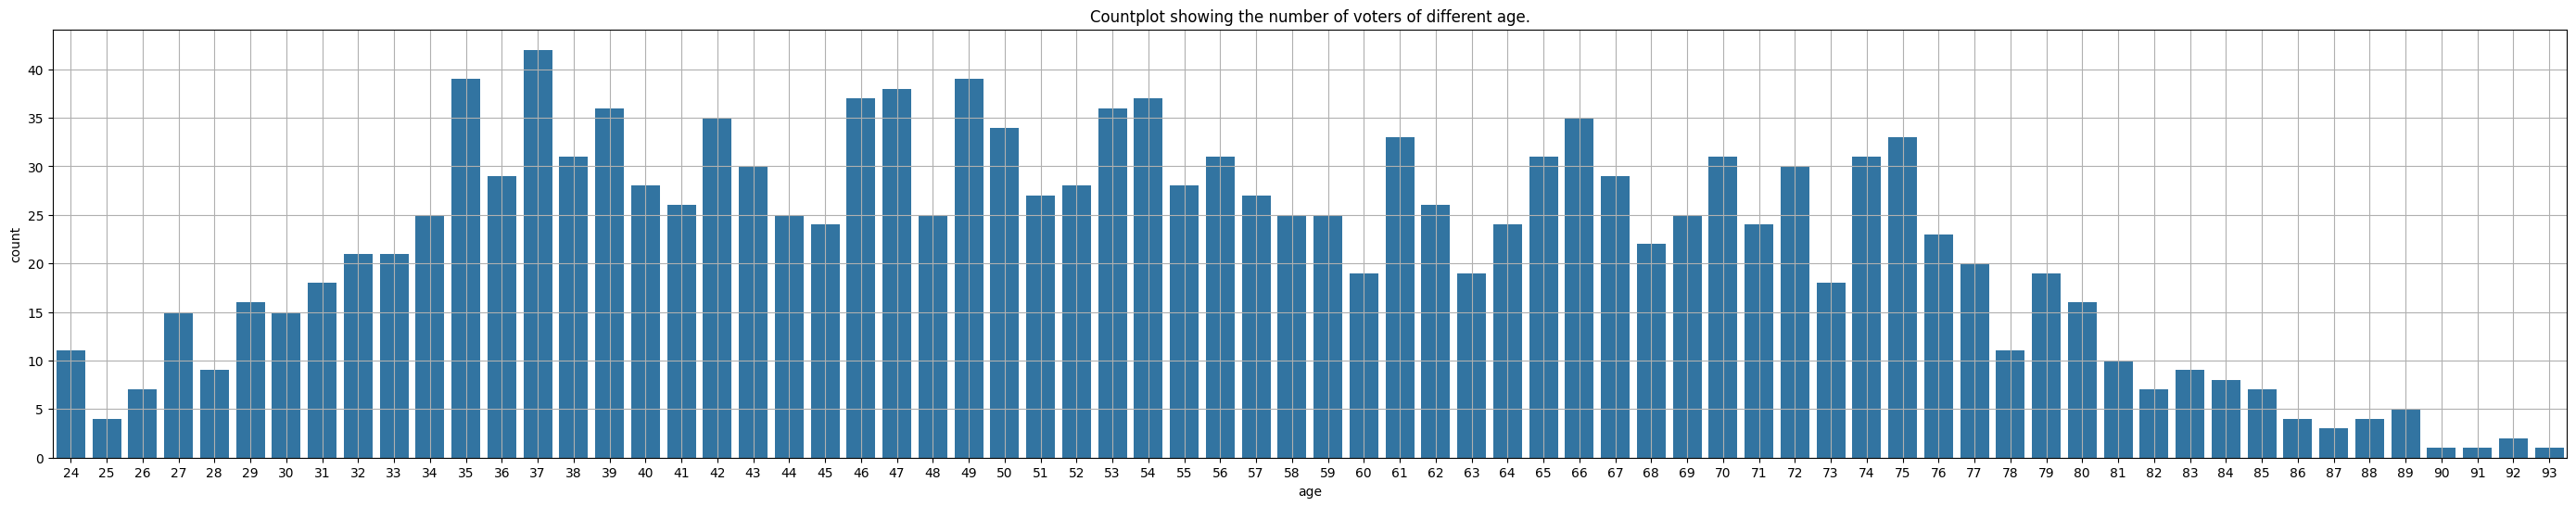

In [ ]:
plt.figure(figsize = (35, 6))
sns.countplot(x = 'age', data = election_df)
plt.grid()
plt.title('Countplot showing the number of voters of different age.')

Text(0.5, 1.0, 'Number of voters of all age who voted for the Conservative and Labour.')

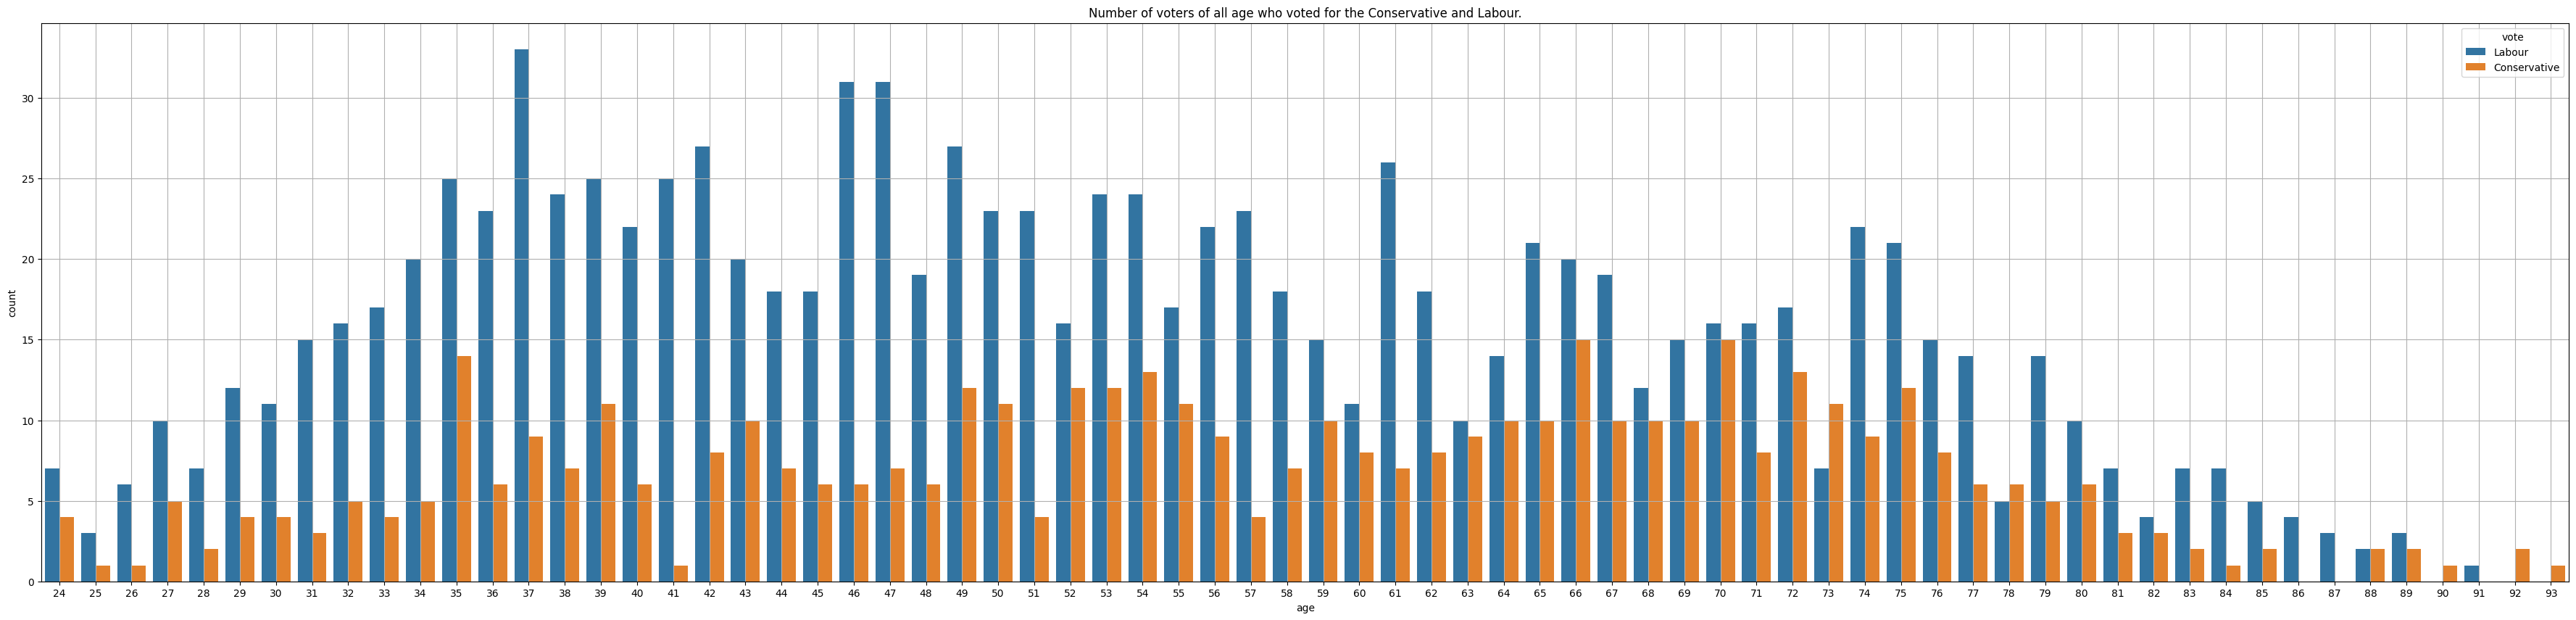

In [ ]:
plt.figure(figsize = (45, 10))
sns.countplot(x = 'age', data = election_df, hue = 'vote')
plt.grid()
plt.title('Number of voters of all age who voted for the Conservative and Labour.')

* Voter ages range from 24 to 93, with varying numbers of voters in each age group.

* The majority of voters, except those aged 90, 92, and 93, had voted for the Labour Party.

* Voters aged 90, 92, & 93 had voted for the Conservative party.

In [ ]:
print('Number of male and female voters in election_df are-\n{}\n'.format(election_df['gender'].value_counts()))

print('Percentage of male and female voters in election_df are-\n{}\n'.format(election_df['gender'].value_counts(normalize = True)))

Number of male and female voters in election_df are-
gender
female    812
male      713
Name: count, dtype: int64

Percentage of male and female voters in election_df are-
gender
female    0.532459
male      0.467541
Name: proportion, dtype: float64



Text(0.5, 1.0, 'Number of male and female voters in election_df.')

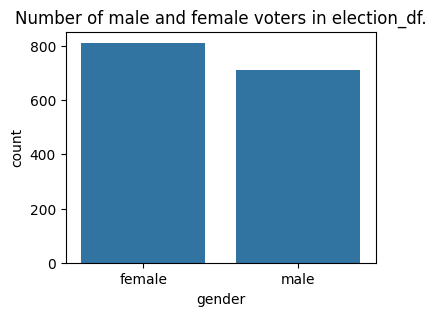

In [ ]:
plt.figure(figsize = (4, 3))
sns.countplot(x = 'gender', data = election_df)
plt.title("Number of male and female voters in election_df.")

Text(0.5, 1.0, 'Number of male and female voters who voted for the Conservative and Labour party.')

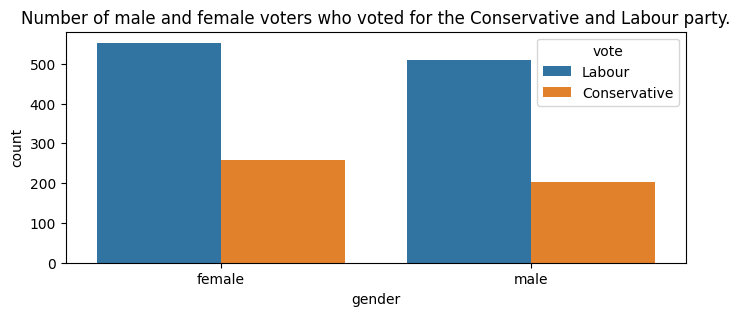

In [ ]:
plt.figure(figsize = (8, 3))
sns.countplot(x = 'gender', data = election_df, hue = 'vote')
plt.title("Number of male and female voters who voted for the Conservative and Labour party.")

* The election data includes both male and female voters, with **females comprising 53.25% and males 46.75% of the electorate.**

* **The majority of both male and female voters supported the Labour Party;** however, **the majority of voters who voted for the Conservative party are female voters**.

In [ ]:
#Assessment of current national economic condition

print('The assessment of the current national economic condition by the voters are as follows-\n{}\n'.format(election_df['economic.cond.national'].value_counts()))

print('The assessment of the current national economic condition by the voters in percentage are as follows-\n{}\n'.format(election_df['economic.cond.national'].value_counts(normalize = 1)))

The assessment of the current national economic condition by the voters are as follows-
economic.cond.national
3    607
4    542
2    257
5     82
1     37
Name: count, dtype: int64

The assessment of the current national economic condition by the voters in percentage are as follows-
economic.cond.national
3    0.398033
4    0.355410
2    0.168525
5    0.053770
1    0.024262
Name: proportion, dtype: float64



Text(0.5, 1.0, 'Assessment of current national economic contition by the voters')

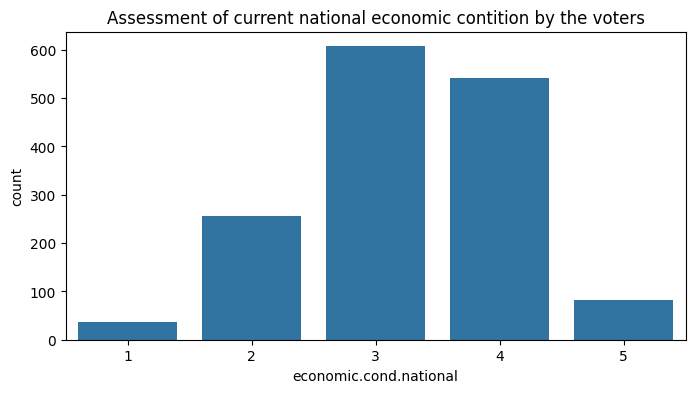

In [ ]:
plt.figure(figsize = (8, 4))
sns.countplot(x = 'economic.cond.national', data = election_df)
plt.title('Assessment of current national economic contition by the voters')

Text(0.5, 1.0, 'Assessment of current national economic contition by the voters and the party they voted')

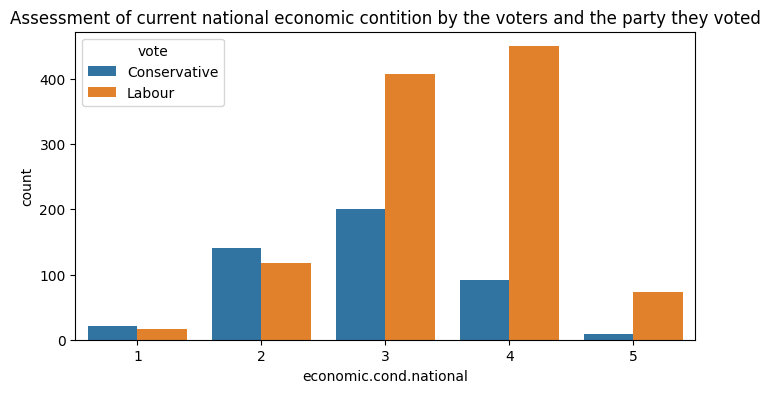

In [ ]:
plt.figure(figsize = (8, 4))
sns.countplot(x = 'economic.cond.national', data = election_df, hue = 'vote')
plt.title('Assessment of current national economic contition by the voters and the party they voted')

* The majority of voters with a strong assessment of the national economic condition voted for the Labour Party, while those with a weak assessment favored the Conservative Party.

In [ ]:
#Assessment of current household economic condition

print('The assessment of the current household economic condition by the voters are as follows-\n{}\n'.format(election_df['economic.cond.household'].value_counts()))

print('The assessment of the current household economic condition by the voters in percentage are as follows-\n{}\n'.format(election_df['economic.cond.household'].value_counts(normalize = 1)))

The assessment of the current household economic condition by the voters are as follows-
economic.cond.household
3    648
4    440
2    280
5     92
1     65
Name: count, dtype: int64

The assessment of the current household economic condition by the voters in percentage are as follows-
economic.cond.household
3    0.424918
4    0.288525
2    0.183607
5    0.060328
1    0.042623
Name: proportion, dtype: float64



Text(0.5, 1.0, 'Assessment of current household economic contition by the voters')

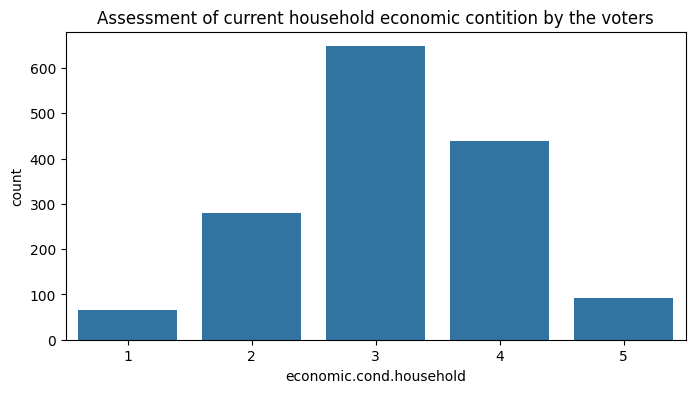

In [ ]:
plt.figure(figsize = (8, 4))
sns.countplot(x = 'economic.cond.household', data = election_df)
plt.title('Assessment of current household economic contition by the voters')

Text(0.5, 1.0, 'Assessment of current household economic contition by the voters and the party they voted')

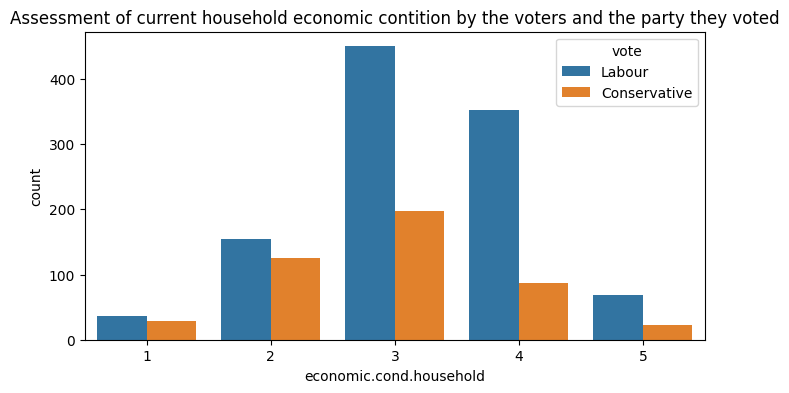

In [ ]:
plt.figure(figsize = (8, 4))
sns.countplot(x = 'economic.cond.household', data = election_df, hue = 'vote')
plt.title('Assessment of current household economic contition by the voters and the party they voted')

* The majority of voters, regardless of their household economic assessment, voted for the Labour Party, suggesting that household economic conditions were not a strong determinant in vote choice.

In [ ]:
#Assessment of the Labour leader

print('The assessment of the Labour leader by the voters are as follows-\n{}\n'.format(election_df['Blair'].value_counts()))

print('The assessment of the Labour leader by the voters in percentage are as follows-\n{}\n'.format(election_df['Blair'].value_counts(normalize = 1)))

The assessment of the Labour leader by the voters are as follows-
Blair
4    836
2    438
5    153
1     97
3      1
Name: count, dtype: int64

The assessment of the Labour leader by the voters in percentage are as follows-
Blair
4    0.548197
2    0.287213
5    0.100328
1    0.063607
3    0.000656
Name: proportion, dtype: float64



Text(0.5, 1.0, 'Assessment of the Labour party leader by the voters')

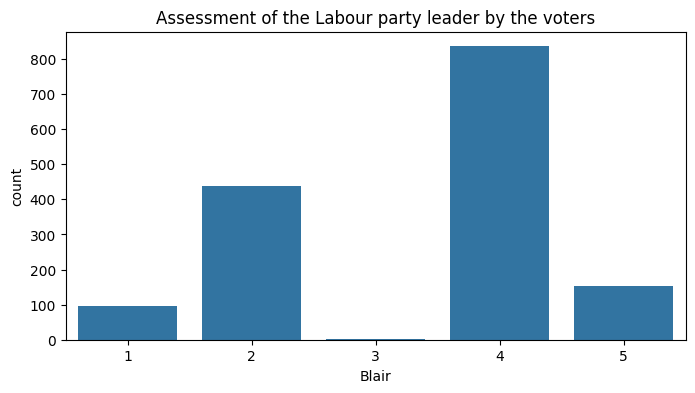

In [ ]:
plt.figure(figsize = (8, 4))
sns.countplot(x = 'Blair', data = election_df)
plt.title('Assessment of the Labour party leader by the voters')

Text(0.5, 1.0, 'Assessment of the Labour party leader by the voters and the party they voted')

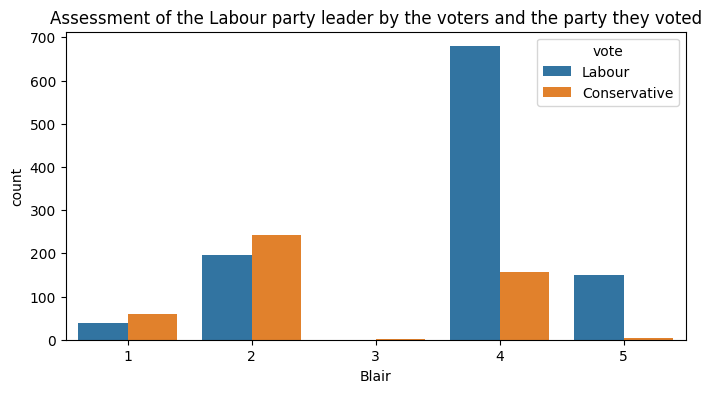

In [ ]:
plt.figure(figsize = (8, 4))
sns.countplot(x = 'Blair', data = election_df, hue = 'vote')
plt.title('Assessment of the Labour party leader by the voters and the party they voted')

* A strong assessment of the Labour leader correlated with votes for the Labour party

In [ ]:
#Assessment of the Conservative leader

print('The assessment of the Conservative leader by the voters are as follows-\n{}\n'.format(election_df['Hague'].value_counts()))

print('The assessment of the Conservative leader by the voters in percentage are as follows-\n{}\n'.format(election_df['Hague'].value_counts(normalize = 1)))

The assessment of the Conservative leader by the voters are as follows-
Hague
2    624
4    558
1    233
5     73
3     37
Name: count, dtype: int64

The assessment of the Conservative leader by the voters in percentage are as follows-
Hague
2    0.409180
4    0.365902
1    0.152787
5    0.047869
3    0.024262
Name: proportion, dtype: float64



Text(0.5, 1.0, 'Assessment of the Conservative party leader by the voters')

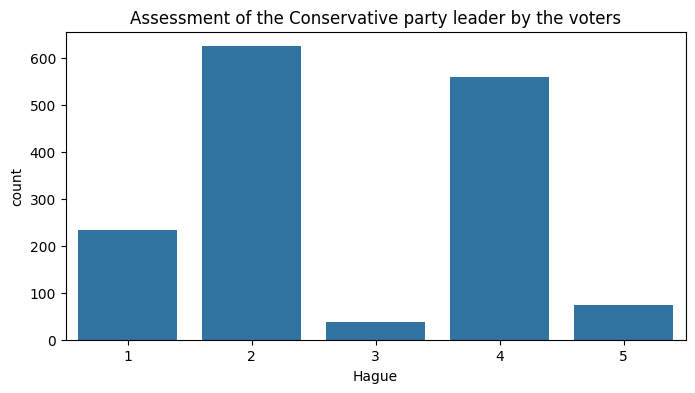

In [ ]:
plt.figure(figsize = (8, 4))
sns.countplot(x = 'Hague', data = election_df)
plt.title('Assessment of the Conservative party leader by the voters')

Text(0.5, 1.0, 'Assessment of the Conservative party leader by the voters and the party they voted')

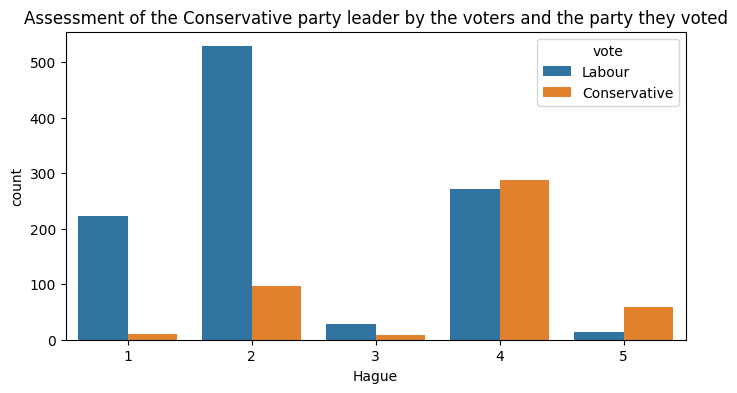

In [ ]:
plt.figure(figsize = (8, 4))
sns.countplot(x = 'Hague', data = election_df, hue = 'vote')
plt.title('Assessment of the Conservative party leader by the voters and the party they voted')

* A weak assessment correlated with votes for the Conservative party.

In [ ]:
#Voters attitude toward European integration

print('The assessment of the voters attitude toward European integration are as follows-\n{}\n'.format(election_df['Europe'].value_counts()))

print('The assessment of the voters attitude toward European integration in percentage are as follows-\n{}\n'.format(election_df['Europe'].value_counts(normalize = 1)))

The assessment of the voters attitude toward European integration are as follows-
Europe
11    338
6     209
3     129
4     127
5     124
8     112
9     111
1     109
10    101
7      86
2      79
Name: count, dtype: int64

The assessment of the voters attitude toward European integration in percentage are as follows-
Europe
11    0.221639
6     0.137049
3     0.084590
4     0.083279
5     0.081311
8     0.073443
9     0.072787
1     0.071475
10    0.066230
7     0.056393
2     0.051803
Name: proportion, dtype: float64



Text(0.5, 1.0, 'Assessment of the voters attitude toward European integration')

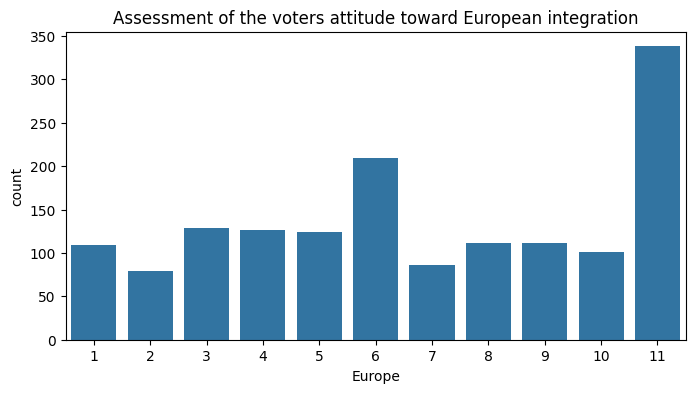

In [ ]:
plt.figure(figsize = (8, 4))
sns.countplot(x = 'Europe', data = election_df)
plt.title('Assessment of the voters attitude toward European integration')

Text(0.5, 1.0, 'Assessment of the voters attitude toward European integration and the party they voted')

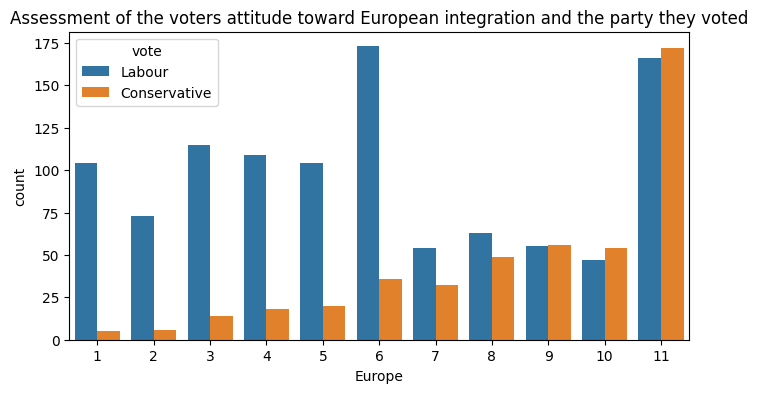

In [ ]:
plt.figure(figsize = (8, 4))
sns.countplot(x = 'Europe', data = election_df, hue = 'vote')
plt.title('Assessment of the voters attitude toward European integration and the party they voted')

* Voters who rated European integration from 1 to 8 mostly voted for Labour, while those who rated it from 9 to 11 favored the Conservative party.

In [ ]:
# Knowledge of parties positions on European integration

print('Voters knowledge of parties position on European integration-\n{}\n'.format(election_df['political.knowledge'].value_counts()))

print('Voters knowledge of parties position on European integration in percentage are as follows-\n{}\n'.format(election_df['political.knowledge'].value_counts(normalize = 1)))

Voters knowledge of parties position on European integration-
political.knowledge
2    782
0    455
3    250
1     38
Name: count, dtype: int64

Voters knowledge of parties position on European integration in percentage are as follows-
political.knowledge
2    0.512787
0    0.298361
3    0.163934
1    0.024918
Name: proportion, dtype: float64



Text(0.5, 1.0, 'Voters knowledge of parties position on European integration')

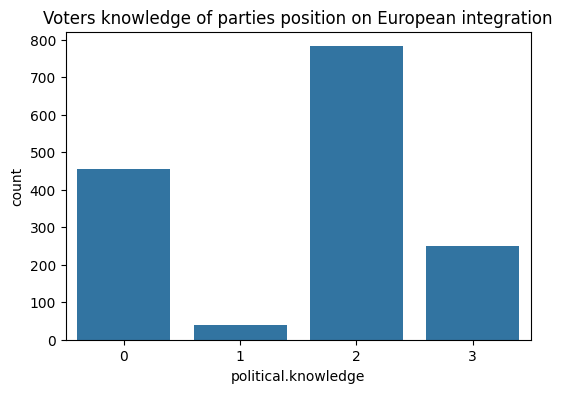

In [ ]:
plt.figure(figsize = (6, 4))
sns.countplot(x = 'political.knowledge', data = election_df)
plt.title('Voters knowledge of parties position on European integration')

Text(0.5, 1.0, 'Voters knowledge of parties position on European integration and the party they voted')

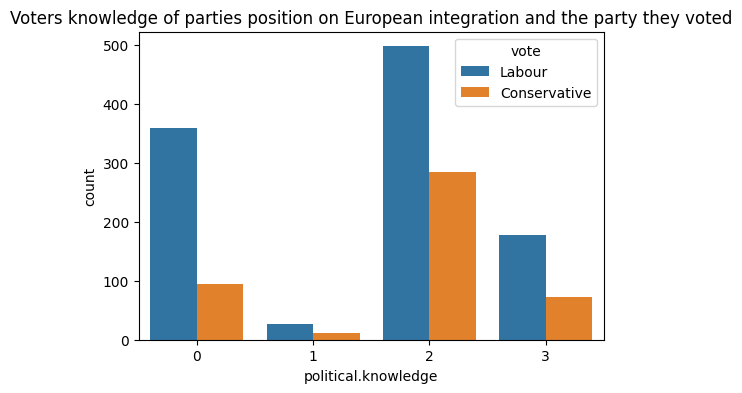

In [ ]:
plt.figure(figsize = (6, 4))
sns.countplot(x = 'political.knowledge', data = election_df, hue = 'vote')
plt.title('Voters knowledge of parties position on European integration and the party they voted')

* The majority of voters, regardless of their political knowledge, voted for the Labour Party, suggesting that political knowledge is not a strong determinant in vote choice .

In [ ]:
# Descriptive statistics of election_df

election_df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


<Axes: >

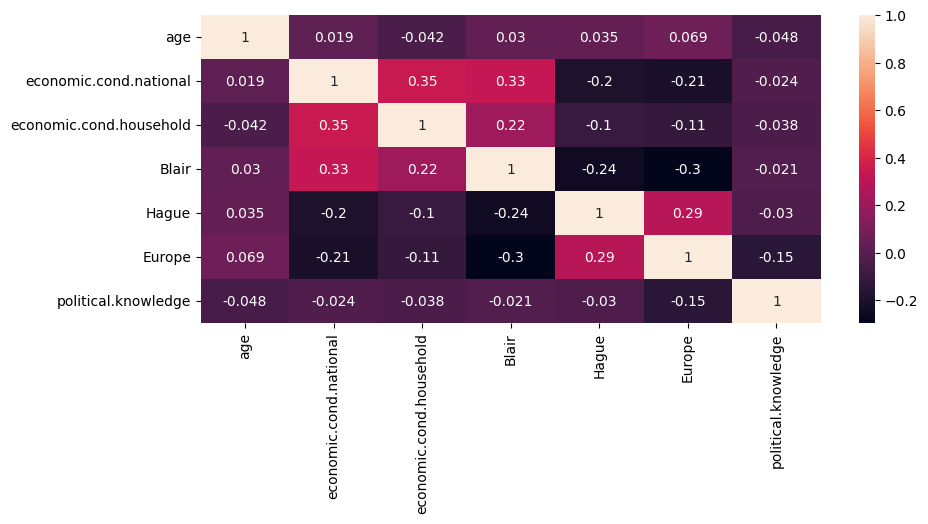

In [ ]:
plt.figure(figsize = (10, 4))
sns.heatmap(election_df[['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']].corr(), annot = True)

In [ ]:
for col in election_df.columns:
  if election_df[col].dtype == 'object':
    print('feature: ', col)
    print(pd.Categorical(election_df[col].unique()))
    print(pd.Categorical(election_df[col].unique()).codes)
    election_df[col] = pd.Categorical(election_df[col]).codes
    print('\n')


feature:  vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


feature:  gender
['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]




In [ ]:
election_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1525 non-null   int8 
 1   age                      1525 non-null   int64
 2   economic.cond.national   1525 non-null   int64
 3   economic.cond.household  1525 non-null   int64
 4   Blair                    1525 non-null   int64
 5   Hague                    1525 non-null   int64
 6   Europe                   1525 non-null   int64
 7   political.knowledge      1525 non-null   int64
 8   gender                   1525 non-null   int8 
dtypes: int64(7), int8(2)
memory usage: 86.5 KB


In [ ]:
X = election_df.drop('vote', axis = 1).values
y = election_df['vote'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [ ]:
sscaler = StandardScaler()

In [ ]:
X_train = sscaler.fit_transform(X_train)
X_test = sscaler.transform(X_test)

In [ ]:
X_train

array([[-1.16463579, -0.28606223, -0.14813431, ..., -0.23165333,
         1.35529823,  1.0411457 ],
       [-0.46303284, -0.28606223,  0.91266645, ..., -0.83673068,
         0.42890283,  1.0411457 ],
       [-0.08034032,  0.82385922,  0.91266645, ...,  0.97850138,
        -1.42388795,  1.0411457 ],
       ...,
       [-1.54732831, -0.28606223,  0.91266645, ...,  1.28104006,
        -1.42388795,  1.0411457 ],
       [-1.61111039,  0.82385922,  1.97346721, ...,  0.37342403,
        -1.42388795, -0.96048036],
       [-0.33546867,  0.82385922, -0.14813431, ...,  0.37342403,
         0.42890283,  1.0411457 ]])

In [ ]:
X_test

array([[ 0.23857011, -0.28606223, -0.14813431, ..., -0.83673068,
         1.35529823, -0.96048036],
       [ 0.11100594, -0.28606223, -0.14813431, ..., -1.13926936,
        -1.42388795,  1.0411457 ],
       [ 0.11100594, -0.28606223, -1.20893507, ..., -0.83673068,
        -1.42388795, -0.96048036],
       ...,
       [ 0.87639097, -0.28606223,  1.97346721, ...,  1.28104006,
         0.42890283,  1.0411457 ],
       [-1.22841788,  0.82385922,  0.91266645, ..., -0.23165333,
         0.42890283, -0.96048036],
       [-0.08034032,  0.82385922,  0.91266645, ...,  0.97850138,
         0.42890283, -0.96048036]])

**DeepLearning model**

In [ ]:
dd_model = Sequential()

# Input
dd_model.add(Dense(512, activation = 'relu', input_dim = X_train.shape[1]))
dd_model.add(Dropout(0.25))

# Hidden
dd_model.add(Dense(256, activation = 'relu'))
dd_model.add(Dropout(0.25))

dd_model.add(Dense(128, activation = 'relu'))
dd_model.add(Dropout(0.25))

dd_model.add(Dense(64, activation = 'relu'))
dd_model.add(Dropout(0.25))

dd_model.add(Dense(32, activation = 'relu'))
dd_model.add(Dropout(0.25))

dd_model.add(Dense(16, activation = 'relu'))
dd_model.add(Dropout(0.25))

dd_model.add(Dense(8, activation = 'relu'))
dd_model.add(Dropout(0.25))

# Output
dd_model.add(Dense(1, activation = 'sigmoid'))

# Compilation
dd_model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [ ]:
dd_model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 300, callbacks = early_stop, verbose = 1)

Epoch 1/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.6339 - val_loss: 0.4171
Epoch 2/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4821 - val_loss: 0.4128
Epoch 3/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.4361 - val_loss: 0.4058
Epoch 4/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4144 - val_loss: 0.3778
Epoch 5/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4192 - val_loss: 0.3747
Epoch 6/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4192 - val_loss: 0.3631
Epoch 7/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3957 - val_loss: 0.3561
Epoch 8/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4297 - val_loss: 0.3638
Epoch 9/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3824 - val_loss: 0.3541
Epoch 10/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3878 - val_loss: 0.3556
Epoch 11/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3920 - val_loss: 0.3558
Epoch 12/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - l

In [ ]:
dd_model_loss = pd.DataFrame(dd_model.history.history)
dd_model_loss

,loss,val_loss
0,0.582188,0.417120
1,0.490773,0.412755
2,0.469880,0.405844
3,0.440818,0.377784
4,0.423873,0.374657
5,0.409934,0.363072
6,0.404750,0.356127
7,0.422559,0.363841
8,0.392242,0.354124
9,0.389515,0.355636


<Figure size 700x400 with 0 Axes>

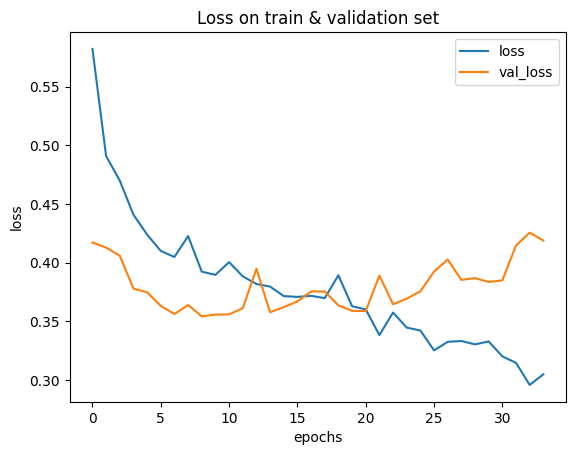

In [ ]:
plt.figure(figsize = (7, 4))
dd_model_loss.plot()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss on train & validation set')
plt.show()

In [ ]:
# Prediction on train data

y_train_predict_prob = dd_model.predict(X_train)

threshold = 0.50

y_train_predict = (y_train_predict_prob >= threshold).astype(int)
y_train_predict

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
# Confusion matrix on train set

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict))
cm_train

,0,1
0,263,59
1,53,692


In [ ]:
# Classification report on train data

print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       322
           1       0.92      0.93      0.93       745

    accuracy                           0.90      1067
   macro avg       0.88      0.87      0.87      1067
weighted avg       0.89      0.90      0.89      1067



In [ ]:
# roc_auc_score on train data

roc_score_train = roc_auc_score(y_train, y_train_predict_prob)
print(f"roc_auc_score on train data : {roc_score_train}")

roc_auc_score on train data : 0.9592813372795865


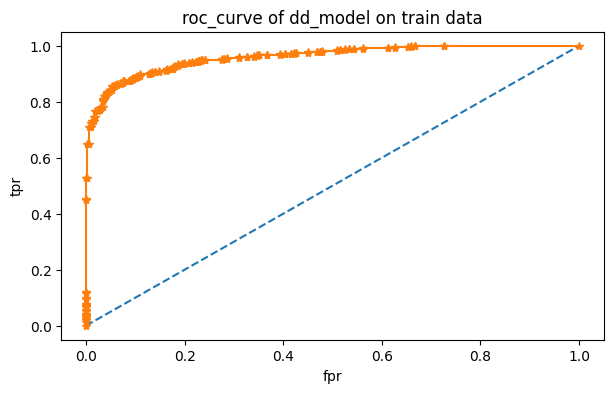

In [ ]:
# roc curve on train data

fpr, tpr, threshold = roc_curve(y_train, y_train_predict_prob)

plt.figure(figsize = (7, 4))
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc_curve of dd_model on train data')
plt.show()

In [ ]:
# Prediction on test data

y_test_predict_prob = dd_model.predict(X_test)

threshold = 0.50

y_test_predict = (y_test_predict_prob >= threshold).astype(int)
y_test_predict

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
    

In [ ]:
# Confusion matrix on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict))
cm_test

,0,1
0,99,41
1,39,279


In [ ]:
# Classification report on test data

print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       140
           1       0.87      0.88      0.87       318

    accuracy                           0.83       458
   macro avg       0.79      0.79      0.79       458
weighted avg       0.82      0.83      0.82       458



In [ ]:
# roc_auc_score on test data

roc_score_test = roc_auc_score(y_test, y_test_predict_prob)
print(f"roc_auc_score on test data : {roc_score_test}")

roc_auc_score on test data : 0.8919586702605571


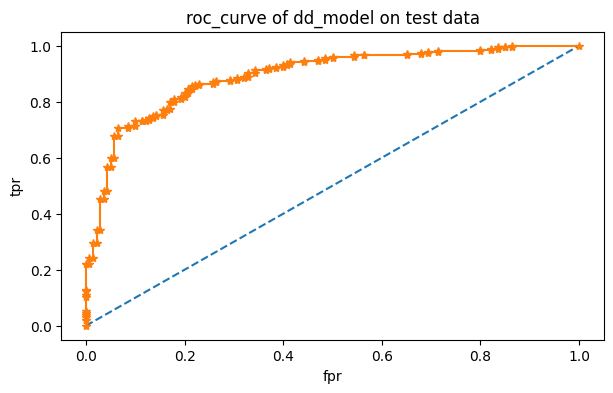

In [ ]:
# roc curve on test data

fpr, tpr, threshold = roc_curve(y_test, y_test_predict_prob)

plt.figure(figsize = (7, 4))
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc_curve of dd_model on test data')
plt.show()

**Training Set Performance:**
1. The DeepLearning model achieves an accuracy of 0.90 on the training set.
2. Class 0 metrics are robust (precision=0.83, recall=0.82, F1-score=0.82), while Class 1 metrics are outstanding (precision=0.92, recall=0.93, F1-score=0.93).
3. The ROC AUC score is 0.96, demonstrating strong predictive power.

**Test Set Performance:**
1. On the test set, the accuracy remains steady at 0.83 .
2. Class 0 metrics are moderate (precision=0.72, recall=0.71, F1-score=0.71), while class 1 metrics are robust (precision=0.87, recall=0.88, F1-score=0.87).
3. The ROC AUC score is 0.89, demonstrating strong predictive power.

**Analysis:** The DeepLearning  maintains consistent performance across training and test sets, suggesting good generalization capabilities. There is a drop in performance on the test set, particularly for class 0, indicating potential challenges in handling imbalanced data.